In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('./crop.csv')
print('Data Shape: ', df.shape)
## info
df.info()
# type of data
df.dtypes

Data Shape:  (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N                int64
P                int64
K                int64
Temperature    float64
Humidity       float64
ph             float64
Rainfall       float64
label           object
dtype: object

In [ ]:
df.isna().sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
ph             0
Rainfall       0
label          0
dtype: int64

In [ ]:
# Unique Name of the Crops in Dataset
crops = df['label'].unique()
crops.sort()
print ("Total Number of Crops Data: ", len(crops) )
print("\n","-"*20, " List of Crops ", "-"*20)
crops.tolist()

Total Number of Crops Data:  22

 --------------------  List of Crops  --------------------


['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [ ]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
# get top 5 most frequent growing crops
n = 5
df['label'].value_counts()[:5].index.tolist()

['rice', 'maize', 'jute', 'cotton', 'coconut']

In [ ]:
# Number of Rows against each Crop
print("Number of Records Against Eash Crop")
print("-"*35)
print(df['label'].value_counts() )

Number of Records Against Eash Crop
-----------------------------------
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [ ]:
#Columns Name
df.columns

Index(['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall', 'label'], dtype='object')

In [ ]:
# Features Selection
selected_features = {'N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall'}
selected_features

{'Humidity', 'K', 'N', 'P', 'Rainfall', 'Temperature', 'ph'}

In [ ]:
## describe
df.describe()

,N,P,K,Temperature,Humidity,ph,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


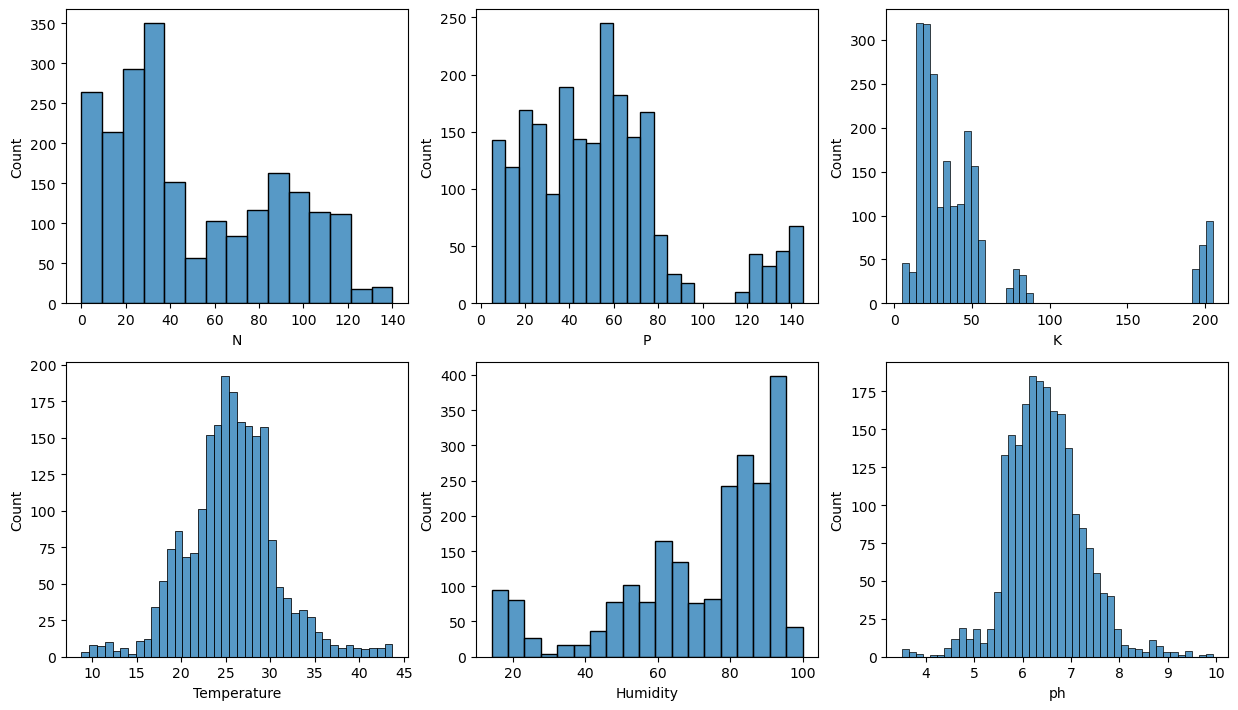

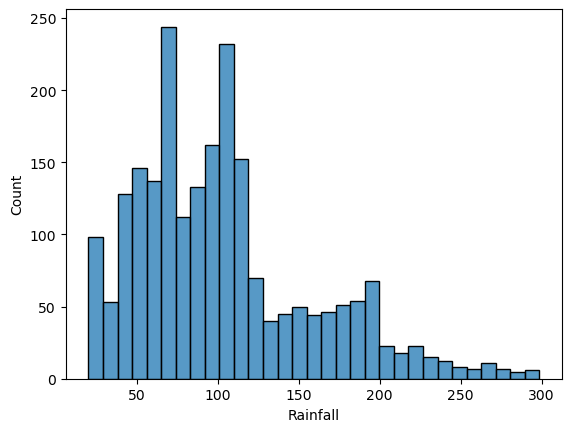

In [ ]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

sns.histplot(df[all_columns[-1]])
plt.show()

In [ ]:
df.corr(numeric_only=True)

,N,P,K,Temperature,Humidity,ph,Rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

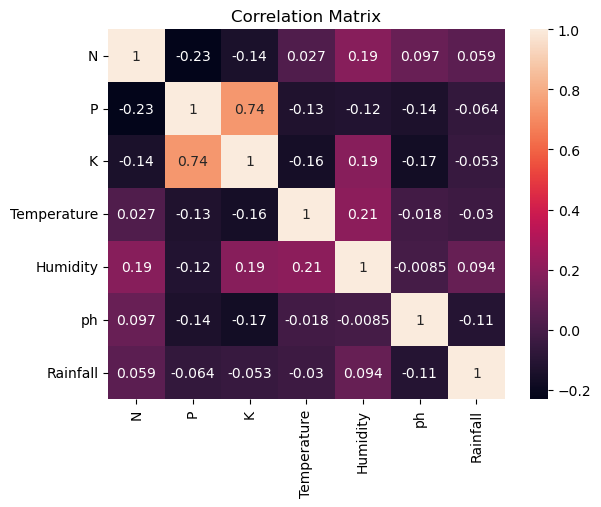

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot =True)
plt.title('Correlation Matrix')

In [ ]:
#

df  = shuffle(df,random_state=5)
df.head()

,N,P,K,Temperature,Humidity,ph,Rainfall,label
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon


#**Encoding target variable**

In [ ]:
xdf = df.copy()
xdf

,N,P,K,Temperature,Humidity,ph,Rainfall,label
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon
...,...,...,...,...,...,...,...,...
740,24,80,19,29.678925,69.085455,6.808042,65.664366,blackgram
1032,105,74,45,25.145176,81.382041,6.098369,119.218154,banana
2121,83,21,28,25.567483,60.492446,7.466901,190.225784,coffee
1424,102,25,50,28.204808,92.914404,6.099662,20.360011,muskmelon


In [ ]:
labelencoder= LabelEncoder() # initializing an object of class LabelEncoder
#Fit and Transforming the label column.
xdf['label_codes'] = labelencoder.fit_transform(xdf['label'])
xdf

,N,P,K,Temperature,Humidity,ph,Rainfall,label,label_codes
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes,7
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon,15
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut,4
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea,3
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon,21
...,...,...,...,...,...,...,...,...,...
740,24,80,19,29.678925,69.085455,6.808042,65.664366,blackgram,2
1032,105,74,45,25.145176,81.382041,6.098369,119.218154,banana,1
2121,83,21,28,25.567483,60.492446,7.466901,190.225784,coffee,5
1424,102,25,50,28.204808,92.914404,6.099662,20.360011,muskmelon,15


In [ ]:
y = xdf['label_codes'] # Targeted Values Selection
X = xdf[list(selected_features)] # Independent Values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X

,Temperature,Rainfall,P,K,N,Humidity,ph
1270,17.665584,69.867126,140,205,6,82.929034,6.313086
1481,29.072653,28.835684,22,47,98,91.915332,6.341401
1832,26.924495,194.902214,14,30,38,91.201060,5.570745
293,17.815645,90.820976,63,76,35,17.607566,7.714153
1307,25.965342,59.463386,22,53,85,89.770767,6.849472
...,...,...,...,...,...,...,...
740,29.678925,65.664366,80,19,24,69.085455,6.808042
1032,25.145176,119.218154,74,45,105,81.382041,6.098369
2121,25.567483,190.225784,21,28,83,60.492446,7.466901
1424,28.204808,20.360011,25,50,102,92.914404,6.099662


In [ ]:
y

1270     7
1481    15
1832     4
293      3
1307    21
        ..
740      2
1032     1
2121     5
1424    15
1725    17
Name: label_codes, Length: 2200, dtype: int32

**Splitting the data into training data and testing data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X.shape,X_train.shape,X_test.shape)

(2200, 7) (1540, 7) (660, 7)


**Model build- linear .fit .predict**

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()  ## importing the model object
LR.fit(X_train,y_train) ## fitting the training data

X_test_pred=LR.predict(X_test)

In [ ]:
LR1=LinearRegression()
LR1.fit(X_train,y_train)
y_pred = LR1.predict(X_train)

In [ ]:
LR.fit(X_test, y_test)
y_pred_1 = LR.predict(X_test)

In [ ]:
X_train_pred=LR.predict(X_train)
X_train_pred

array([12.22536509, 10.62209979,  8.18935527, ..., 13.68874418,
       12.61063497, 11.88132166])

In [ ]:
y_train

78      20
1736    17
780      2
2075     8
985     19
        ..
795      2
1020     1
1448    15
629     14
2018     8
Name: label_codes, Length: 1540, dtype: int32

**Prediction**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
## prediction on training data
train_score=r2_score(y_train,X_train_pred)
print('Linear Regression training score :',train_score)

Linear Regression training score : 0.26186260104249315


In [ ]:
## prediction on testing data
test_score=r2_score(y_test,X_test_pred)
print('Linear Regression testing score :',test_score)

Linear Regression testing score : 0.3277008991299173


**Mean squared error and mean absolute error**

In [ ]:
print('MSE:',mean_squared_error(y_train,X_train_pred))
print('MAE:',mean_absolute_error(y_train,X_train_pred))

MSE: 29.560868725010057
MAE: 4.20433246459794


In [ ]:
## mean squared error and mean absolute error of testing data
print('MSE',mean_squared_error(y_test,X_test_pred))
print('MAE',mean_absolute_error(y_test,X_test_pred))

MSE 27.169234938775784
MAE 4.1389796679637225


**Root mean squared error**

In [ ]:
import math
print(math.sqrt(mean_squared_error(y_test,X_test_pred)))
print(math.sqrt(mean_squared_error(y_train,X_train_pred)))

5.212411624073427
5.436990778455492


In [ ]:
X_train.shape,X_test.shape

((1540, 7), (660, 7))

In [ ]:
train_adjusted_r2score=1-(1-0.71)*(1003-1)/(1003-6-1)
train_adjusted_r2score

0.7082530120481927

In [ ]:
test_adjusted_r2score=1-(1-0.74)*(335-1)/(335-6-1)
test_adjusted_r2score

0.7352439024390244

**2. Mean of Residuals**

In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.7683483211432474e-16


In [ ]:
residuals_1 = y_test.values-y_pred_1
mean_residuals_1 = np.mean(residuals_1)
print("Mean of Residuals {}".format(mean_residuals_1))

Mean of Residuals -1.4426170695735368e-15


**Goldfeld Quandt Test**

In [ ]:
%pip install -q statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9665532406760614), ('p-value', 0.6807072639142049)]

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals_1, X_test)
lzip(name, test)

[('F statistic', 1.170945397173676), ('p-value', 0.07834694938411442)]

**4. Check for Normality of error terms/residuals**

<Figure size 500x800 with 0 Axes>

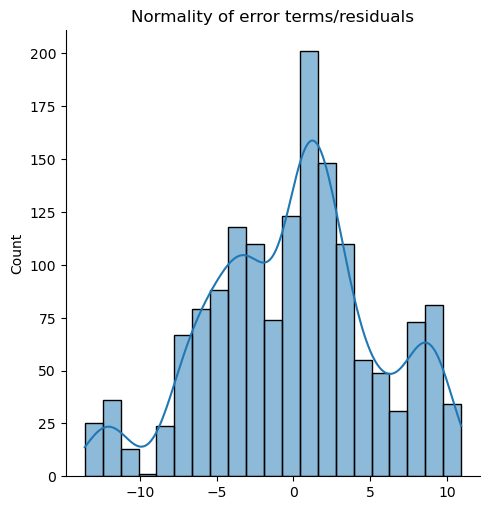

In [ ]:
plt.figure(figsize=(5,8))
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

<Figure size 500x800 with 0 Axes>

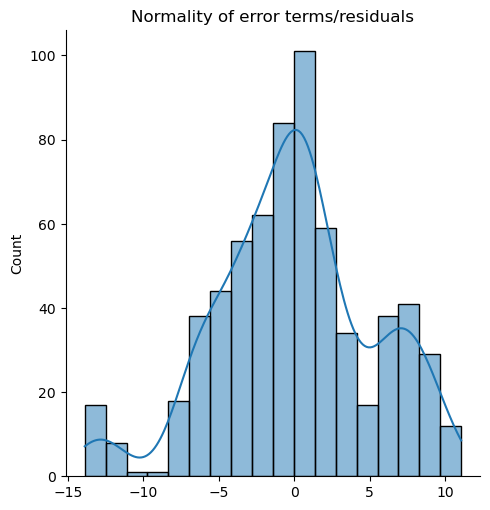

In [ ]:
plt.figure(figsize=(5,8))
p = sns.displot(residuals_1,kde=True)
p = plt.title('Normality of error terms/residuals')

**5. No autocorrelation of residuals**

In [ ]:
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.diagnostic import acorr_ljungbox

test_results = acorr_ljungbox(residuals, lags=40)
test_results

,lb_stat,lb_pvalue
1,0.000548,0.981318
2,0.556577,0.757078
3,1.865964,0.600687
4,3.393398,0.494271
5,4.248306,0.514248
6,5.688879,0.458928
7,8.428121,0.296359
8,8.900334,0.350773
9,8.990958,0.438109
10,9.000418,0.532064


In [ ]:
diag.acorr_ljungbox(residuals_1 , lags = 40)

,lb_stat,lb_pvalue
1,0.097773,0.754518
2,0.728623,0.694675
3,0.828398,0.842663
4,3.775712,0.437210
5,15.733451,0.007648
6,16.901531,0.009652
7,16.990058,0.017460
8,18.397865,0.018434
9,20.437317,0.015397
10,20.472053,0.025091


In [ ]:
# shuffling the dataset to remove order
from sklearn.utils import shuffle
df  = shuffle(df,random_state=5)
df.head()

,N,P,K,Temperature,Humidity,ph,Rainfall,label
1319,103,17,51,25.111892,80.026213,6.209888,44.206570,watermelon
604,22,56,17,29.878881,87.327612,6.890780,44.752159,mungbean
231,42,79,85,17.223852,15.820693,6.129534,76.575810,chickpea
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize
724,20,60,25,27.325421,69.090478,6.726469,61.192509,blackgram


In [ ]:
# Selection of Feature and Target variables.
x = df[['N', 'P','K','Temperature', 'Humidity', 'ph', 'Rainfall']]
target = df['label']

In [ ]:
# Encoding target variable
y = pd.get_dummies(target)
y

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1319,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
604,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
231,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
724,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
376,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
982,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 22)
y_test : (550, 22)


In [ ]:
# Training
forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, max_features="auto")
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                       max_features='auto',
                                                       random_state=42),
                      n_jobs=-1)

In [ ]:
# Predicting test results
forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, forest_pred)
print('Accuracy score:', accuracy_score(y_test, forest_pred))

Accuracy score: 0.9654545454545455


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_forest,X = x_train, y = y_train,cv=5)
score

array([0.96363636, 0.90909091, 0.94545455, 0.94242424, 0.93636364])

In [ ]:
b1 = "{:.2f}".format(score.mean()*100)
b1 = float(b1)
b1

93.94

In [ ]:
c1 = (score.std()*100)
c1

1.7669551196500914

In [ ]:
print("Accuracy : {:.2f}%".format (score.mean()*100))
print("Standard Deviation : {:.2f}%".format(score.std()*100))

Accuracy : 93.94%
Standard Deviation : 1.77%


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, multilabel_confusion_matrix
precision = precision_score(y_test,forest_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, forest_pred, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test, forest_pred, average='weighted')
print("F1-score:", f1)
score = cross_val_score(multi_target_forest,X = x_train, y = y_train,cv=7)
score.mean()

Precision: 0.996218181818182
Recall: 0.9654545454545455
F1-score: 0.9793481837698123


0.9497063520684147

In [ ]:
# Training
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [ ]:
# Predicting test results
decision_pred = multi_target_decision.predict(x_test)
decision_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test,decision_pred)
print('Accuracy score:', accuracy_score(y_test,decision_pred))
a2

Accuracy score: 0.9236363636363636


0.9236363636363636

**Cross-validation**

In [ ]:
score = cross_val_score(multi_target_decision,X = x_train, y = y_train,cv=7)
score

array([0.97033898, 0.94915254, 0.91949153, 0.95762712, 0.90677966,
       0.92340426, 0.90212766])

In [ ]:
b2 = "{:.2f}".format(score.mean()*100)
b2 = float(b2)
b2

93.27

In [ ]:
c2 = (score.std()*100)
c2

2.442524166826352

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
model = MultiOutputClassifier(knn_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [ ]:
knn_pred = model.predict(x_test)
knn_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [ ]:
# Calculating Accuracy
a3 = accuracy_score(y_test,knn_pred)
print('Accuracy score:', accuracy_score(y_test,knn_pred))
a3

Accuracy score: 0.9727272727272728


0.9727272727272728

In [ ]:
score = cross_val_score(model,X = x_train, y = y_train,cv=7)
score

array([0.96610169, 0.98305085, 0.96610169, 0.97881356, 0.97881356,
       0.9787234 , 0.9787234 ])

In [ ]:
b3 = "{:.2f}".format(score.mean()*100)
b3 = float(b3)
b3

97.58

In [ ]:
c3 = (score.std()*100)
c3

0.6278468193244704

#**Creates pandas DataFrame.**

In [ ]:
# initialise data of lists.
data = {'Algorithms':['Random Forest', 'Decision-tree', 'KNN Classifier'],
        'Accuracy':[b1, b2, b3],
        'Standard Deviation':[c1,c2,c3]}


df = pd.DataFrame(data)

# print the data
df

,Algorithms,Accuracy,Standard Deviation
0,Random Forest,93.94,1.766955
1,Decision-tree,93.27,2.442524
2,KNN Classifier,97.58,0.627847


In [ ]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearForestClassifier
from sklearn.datasets import make_classification

clf = LinearForestClassifier(base_estimator=LinearRegression())
model = MultiOutputClassifier(clf, n_jobs=-1)
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=LinearForestClassifier(base_estimator=LinearRegression()),
                      n_jobs=-1)

In [ ]:
df = pd.read_csv('./crop.csv')
class_names = df['label'].unique().sort()

In [ ]:
linearforestpred = model.predict(x_test)
print(linearforestpred)
a1 = accuracy_score(y_test, linearforestpred)
print('Accuracy score:', accuracy_score(y_test, linearforestpred))
score = cross_val_score(model,X = x_train, y = y_train,cv=5)
score

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False  True False ... False False False]]
Accuracy score: 0.96


array([0.96969697, 0.94848485, 0.94545455, 0.96363636, 0.94848485])

In [ ]:
print("Accuracy : {:.2f}%".format (score.mean()*100))
print("Standard Deviation : {:.2f}%".format(score.std()*100))

Accuracy : 95.52%
Standard Deviation : 0.97%


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
assert len(y_test) == len(linearforestpred)
print(y_test.shape, linearforestpred.shape)
conf_matrix = multilabel_confusion_matrix(y_test, linearforestpred)
print("Confusion Matrix:")
print(conf_matrix.shape)

(550, 22) (550, 22)
Confusion Matrix:
(22, 2, 2)


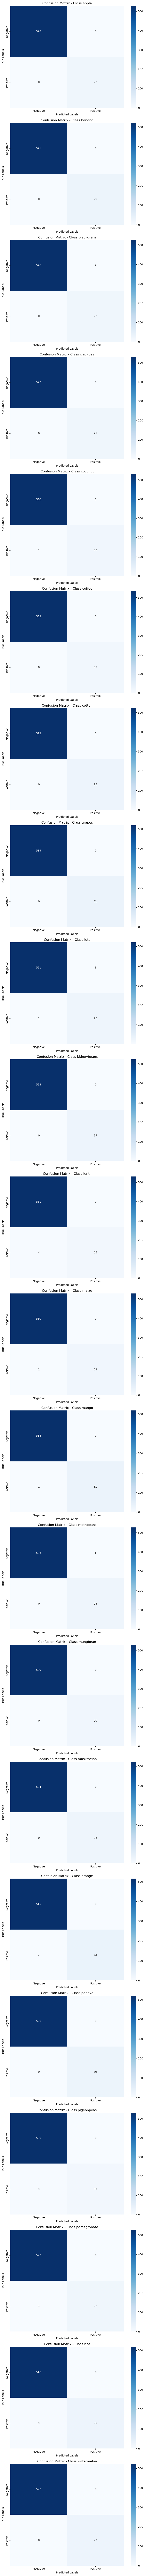

In [ ]:
n_classes = conf_matrix.shape[0]
# Create subplots for each binary confusion matrix
fig, axes = plt.subplots(nrows=n_classes, ncols=1, figsize=(8, 6*n_classes))

# Iterate over each class
for i, ax in enumerate(axes):
    # Create the heatmap for the binary confusion matrix
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='Blues', ax=ax)

    # Set the axis labels and title
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(f'Confusion Matrix - Class {crops[i]}')

    # Set the x and y tick labels
    ax.set_xticklabels([ 'Negative', 'Positive'])
    ax.set_yticklabels([ 'Negative', 'Positive'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
label ='lentil'
df = pd.DataFrame(y_test)
label_count = df[label].sum()
print(f"Count of data for label {label}: {label_count}")

Count of data for label lentil: 19


In [ ]:
precision = precision_score(y_test,linearforestpred, average='weighted')
print("Precision:", precision)

Precision: 0.9898593073593074


In [ ]:
recall = recall_score(y_test, linearforestpred, average='weighted')
print("Recall:", recall)

Recall: 0.9654545454545455


In [ ]:
f1 = f1_score(y_test, linearforestpred, average='weighted')
print("F1-score:", f1)

F1-score: 0.976296801000398


In [ ]:
score = cross_val_score(model,X = x_train, y = y_train,cv=7)
score.mean()

0.9581680490443564

In [ ]:
%pip install -q joblib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from joblib import dump
dump(model, './model/linear_forest_model.joblib')

['./model/linear_forest_model.joblib']